<a href="https://colab.research.google.com/github/bundickm/DS-Unit-1-Sprint-3-Data-Storytelling/blob/master/module2-choose-appropriate-visualizations/LS_DS_222_Choose_appropriate_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_
# Choose appropriate visualizations

Objectives
- fix misleading visualizations
- use Seaborn to visualize distributions and relationships with continuous and discrete variables

Links
- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)
- [Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)
- [Searborn example gallery](http://seaborn.pydata.org/examples/index.html) & [tutorial](http://seaborn.pydata.org/tutorial.html)


# Upgrade Seaborn

Make sure you have at least version 0.9.0.

On Colab, go to **Restart runtime** after you run the `pip` command.

In [1]:
!pip install --upgrade seaborn

    100% |████████████████████████████████| 215kB 26.2MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [91]:
import seaborn as sns
sns.__version__

'0.9.0'

# Fix misleading visualizations

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [15]:
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-3-Data-Storytelling/master/module2-choose-appropriate-visualizations/misleading.py
    
import misleading

--2019-04-02 19:51:14--  https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-3-Data-Storytelling/master/module2-choose-appropriate-visualizations/misleading.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1258 (1.2K) [text/plain]
Saving to: ‘misleading.py’

misleading.py       100%[===================>]   1.23K  --.-KB/s    in 0s      

2019-04-02 19:51:14 (134 MB/s) - ‘misleading.py’ saved [1258/1258]



### Fix misleading plot #1

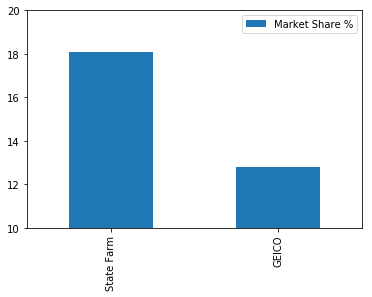

In [16]:
misleading.plot1();

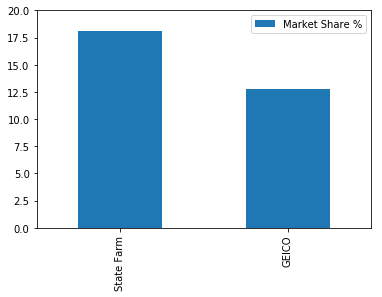

In [17]:
insurance = pd.DataFrame(index=['State Farm', 'GEICO'], data={'Market Share %':[18.07,12.79]})
insurance.plot.bar(ylim=(0,20))

### Fix misleading plot #2

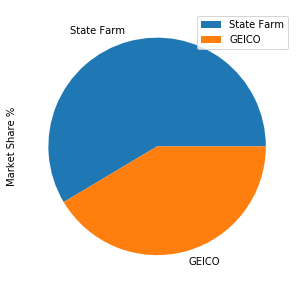

In [18]:
misleading.plot2();

In [19]:
other = pd.DataFrame(index=['Other'], data={'Market Share %':[100- 18.07- 12.79]})
insurance = insurance.append(other)
insurance

,Market Share %
State Farm,18.07
GEICO,12.79
Other,69.14


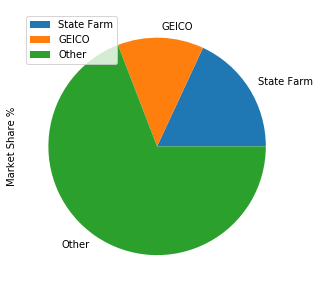

In [20]:
insurance.plot.pie('Market Share %', figsize=(5,5))

### Fix misleading plot #3

_If you're on Jupyter (not Colab) then uncomment and run this cell below:_

In [0]:
# import altair as alt
# alt.renderers.enable('notebook')

In [22]:
misleading.plot3()

Chart({
  data: UrlData({
    format: TopoDataFormat({
      feature: 'states',
      type: 'topojson'
    }),
    url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
  }),
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'State Farm policy premiums',
      type: 'quantitative'
    })
  }),
  height: 300,
  mark: 'geoshape',
  projection: Projection({
    type: 'albersUsa'
  }),
  transform: [LookupTransform({
    from: LookupData({
      data:                    state  id  State Farm policy premiums  \
      0                Alabama   1                      768213   
      1                 Alaska   2                      128613   
      2                Arizona   4                      760003   
      3               Arkansas   5                      454931   
      4             California   6                     3655463   
      5               Colorado   8                      827143   
      6            Connecticut   9                      169773   
      7               Delaware  10                      191319   
      8   District of Columbia  11                       67231   
      9                Florida  12                     2806322   
      10               Georgia  13                     1761224   
      11                Hawaii  15                      133498   
      12                 Idaho  16                      130613   
      13              Illinois  17                     2256543   
      14               Indiana  18                      861382   
      15                  Iowa  19                      368898   
      16                Kansas  20                      351343   
      17              Kentucky  21                      680433   
      18             Louisiana  22                     1415980   
      19                 Maine  23                      101111   
      20              Maryland  24                      883401   
      21         Massachusetts  25                           0   
      22              Michigan  26                     1580398   
      23             Minnesota  27                      851940   
      24           Mississippi  28                      467887   
      25              Missouri  29                      883774   
      26               Montana  30                      156816   
      27              Nebraska  31                      273727   
      28                Nevada  32                      404688   
      29         New Hampshire  33                      103340   
      30            New Jersey  34                      619623   
      31            New Mexico  35                      261922   
      32              New York  36                     1666653   
      33        North Carolina  37                      842368   
      34          North Dakota  38                       67282   
      35                  Ohio  39                     1240075   
      36              Oklahoma  40                      636063   
      37                Oregon  41                      564416   
      38          Pennsylvania  42                     1654528   
      39          Rhode Island  44                           0   
      40        South Carolina  45                      874436   
      41          South Dakota  46                      101912   
      42             Tennessee  47                      889329   
      43                 Texas  48                     3395165   
      44                  Utah  49                      300403   
      45               Vermont  50                       30003   
      46              Virginia  51                      878312   
      47            Washington  53                      794882   
      48         West Virginia  54                      323608   
      49             Wisconsin  55                      443680   
      50               Wyoming  56                       90412   
      51           Puerto Rico  72                           0   
      
          BERKSHIRE HATH

In [0]:
url = 'https://raw.githubusercontent.com/bundickm/DS-Unit-1-Sprint-3-Data-Storytelling/master/module2-choose-appropriate-visualizations/direct_written_premium_by_state_by_group_private_passenger_auto.csv'
df = pd.read_csv(url)

In [24]:
df = df.rename(columns={'STATE FARM GRP': 'State Farm Policy Premiums'})
df.head()

,state,id,State Farm Policy Premiums,BERKSHIRE HATHAWAY GRP,STATE TOTAL
0,Alabama,1,768213,282947,3025561
1,Alaska,2,128613,81366,454623
2,Arizona,4,760003,604049,4373055
3,Arkansas,5,454931,96908,1777917
4,California,6,3655463,2091720,25255501


In [25]:
df['State Farm Market Share %'] = df['State Farm Policy Premiums'] / df['STATE TOTAL']
df.head()

,state,id,State Farm Policy Premiums,BERKSHIRE HATHAWAY GRP,STATE TOTAL,State Farm Market Share %
0,Alabama,1,768213,282947,3025561,0.253908
1,Alaska,2,128613,81366,454623,0.282900
2,Arizona,4,760003,604049,4373055,0.173792
3,Arkansas,5,454931,96908,1777917,0.255879
4,California,6,3655463,2091720,25255501,0.144739


In [0]:
import altair as alt
from vega_datasets import data

In [26]:


variable = 'State Farm Market Share %'
alt.Chart(states).mark_geoshape().encode(
    alt.Color(variable, type='quantitative')
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(df, 'id', [variable])
).properties(
    width=500,
    height=300
).project(
    type='albersUsa')

NameError: ignored

# Use Seaborn to visualize distributions and relationships with continuous and discrete variables

## 1. Anscombe dataset

### Load dataset

In [0]:
df = sns.load_dataset('anscombe')

### See the data's shape

In [106]:
df.shape

(44, 3)

### See the data

In [107]:
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


### [Group by](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) `'dataset'`

In [0]:
groups = df.groupby('dataset')

### [Describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) the groups

In [109]:
groups.describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

### Get the [count](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html), for each column in each group

In [110]:
groups.count()

,x,y
dataset,,
I,11,11
II,11,11
III,11,11
IV,11,11


### Get the [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html) ...

In [111]:
groups.mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


### Get the [standard deviation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html) ...

In [112]:
groups.std()

,x,y
dataset,,
I,3.316625,2.031568
II,3.316625,2.031657
III,3.316625,2.030424
IV,3.316625,2.030579


### Get the [correlation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) ...

In [113]:
groups.corr()

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

### Use pandas to [plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) the groups, as scatter plots

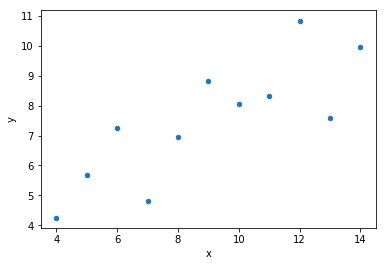

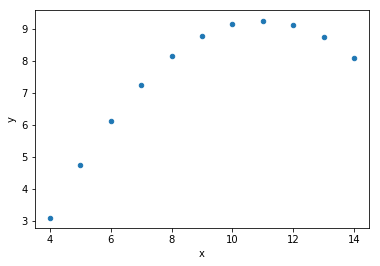

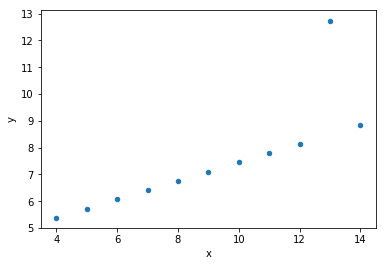

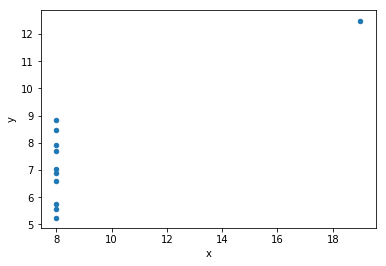

In [114]:
groups.plot('x','y',kind='scatter');

### Use Seaborn to make [relational plots](http://seaborn.pydata.org/generated/seaborn.relplot.html)

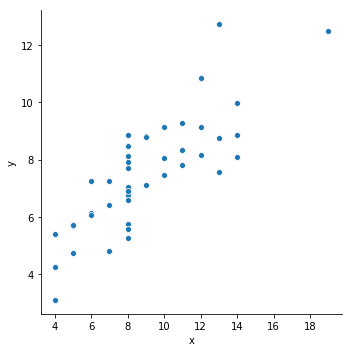

In [115]:
sns.relplot('x','y', data=df)

### Use Seaborn to make [linear model plots](http://seaborn.pydata.org/generated/seaborn.lmplot.html)

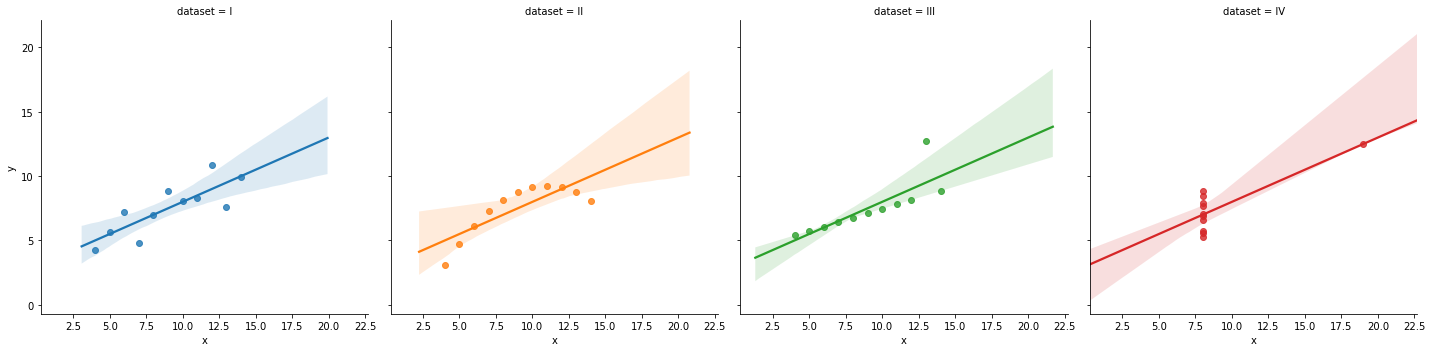

In [116]:
sns.lmplot('x','y', col='dataset',hue='dataset',data=df)

#### Links
- [Seaborn examples: Anscombe's quartet](http://seaborn.pydata.org/examples/anscombes_quartet.html)
- [Wikipedia: Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)
- [The Datasaurus Dozen](https://www.autodeskresearch.com/publications/samestats)

## 2. Tips dataset

### Load dataset

In [0]:
tips = sns.load_dataset('tips')

### See the data's shape

In [118]:
tips.shape

(244, 7)

### See the first 5 rows

In [119]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [120]:
tips['smoker'] = ~tips['smoker'].astype(bool)
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,False,Sun,Dinner,2
1,10.34,1.66,Male,False,Sun,Dinner,3
2,21.01,3.50,Male,False,Sun,Dinner,3
3,23.68,3.31,Male,False,Sun,Dinner,2
4,24.59,3.61,Female,False,Sun,Dinner,4


### Describe the data

In [121]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Make univariate [distribution plots](https://seaborn.pydata.org/generated/seaborn.distplot.html)

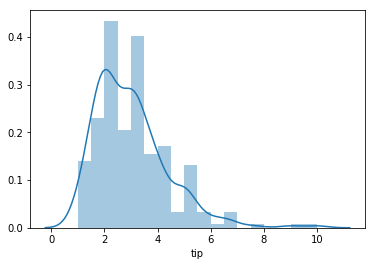

In [122]:
sns.distplot(tips['tip'])

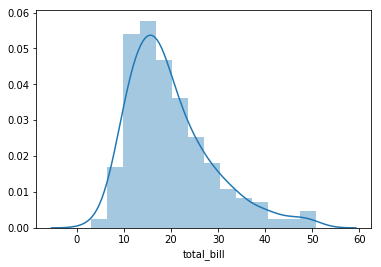

In [123]:
sns.distplot(tips['total_bill'])

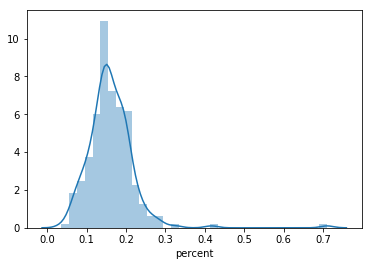

In [124]:
tips['percent'] = tips['tip']/tips['total_bill']
sns.distplot(tips['percent'])

In [125]:
tips['percent'].value_counts(bins=20).sort_index()

(0.034, 0.0694]     6
(0.0694, 0.103]    25
(0.103, 0.137]     42
(0.137, 0.171]     78
(0.171, 0.204]     60
(0.204, 0.238]     20
(0.238, 0.272]      7
(0.272, 0.306]      3
(0.306, 0.339]      1
(0.339, 0.373]      0
(0.373, 0.407]      0
(0.407, 0.44]       1
(0.44, 0.474]       0
(0.474, 0.508]      0
(0.508, 0.542]      0
(0.542, 0.575]      0
(0.575, 0.609]      0
(0.609, 0.643]      0
(0.643, 0.677]      0
(0.677, 0.71]       1
Name: percent, dtype: int64

### Make bivariate [relational plots](https://seaborn.pydata.org/generated/seaborn.relplot.html)

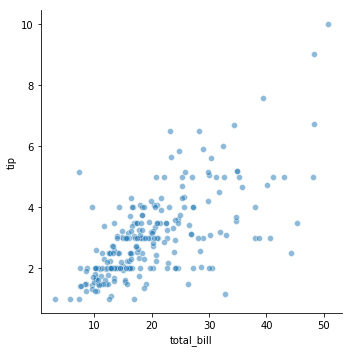

In [126]:
sns.relplot('total_bill', 'tip', data=tips, alpha=.5)

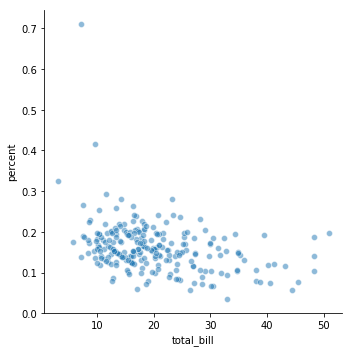

In [127]:
sns.relplot('total_bill', 'percent', data=tips, alpha=.5)

### Make univariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

In [128]:
tips['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

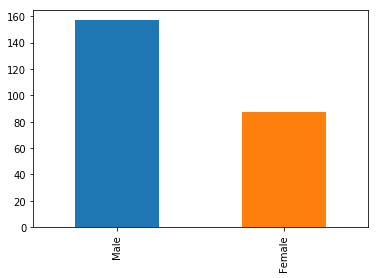

In [129]:
tips['sex'].value_counts().plot.bar()

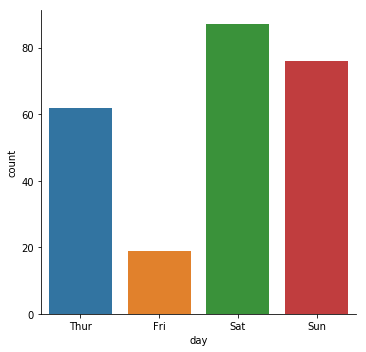

In [130]:
sns.catplot('day', data=tips, kind='count')

### Make bivariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

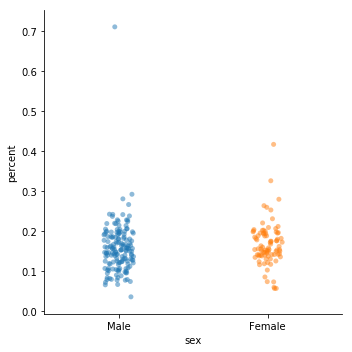

In [131]:
sns.catplot('sex','percent', data=tips, kind='strip', alpha=.5)

In [133]:
tips.groupby('sex')['percent'].mean()

sex
Male      0.157651
Female    0.166491
Name: percent, dtype: float64

## 3. Flights

### Load dataset

In [0]:
flights = sns.load_dataset('flights')

### See the data's shape

In [135]:
flights.shape

(144, 3)

### See the first 5 rows

In [136]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


### Describe the data

In [137]:
flights.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


### Plot year & passengers

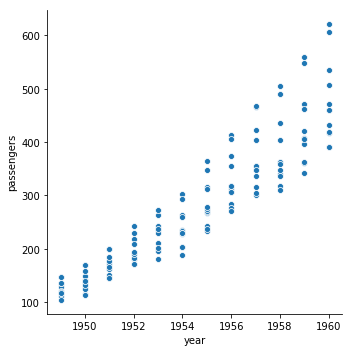

In [138]:
sns.relplot('year', 'passengers', data=flights);

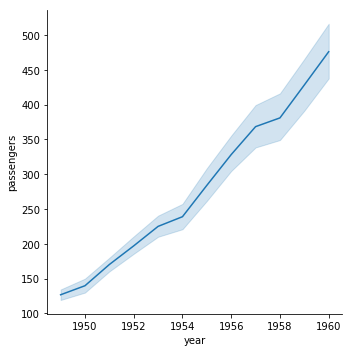

In [139]:
sns.relplot('year', 'passengers', data=flights, kind='line', ci=95);

### Plot month & passengers

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

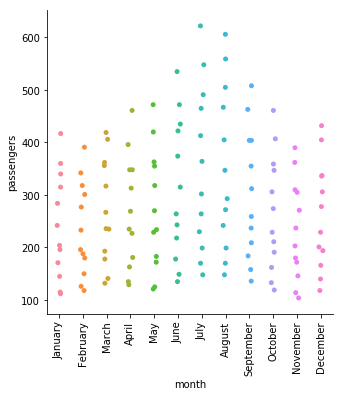

In [140]:
sns.catplot('month', 'passengers',data=flights);
plt.xticks(rotation=90)

### Create a [pivot table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html) of passengers by month and year

In [141]:
table = flights.pivot_table('passengers','month','year')
table

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


### Plot the pivot table as a [heat map](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

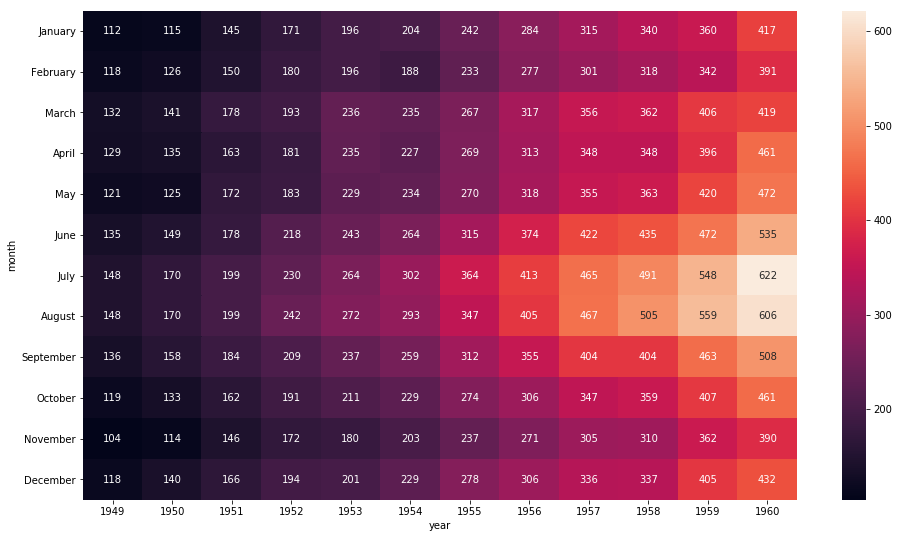

In [142]:
plt.figure(figsize=(16,9))
sns.heatmap(table,annot=True,fmt='d');

# ASSIGNMENT

### 1.

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).  - ***Completed: See above***

### 2.

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

####Bubble Plot

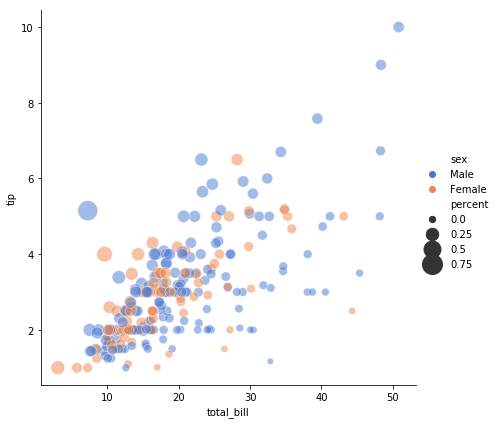

In [143]:
#bubble plot with the tips data frame from above
sns.relplot(x="total_bill", y="tip", hue="sex", size="percent",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=tips);

####Box Plot
Imported the instacart data to test the data set usability after downcasting it to save space

In [0]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz
%cd instacart_2017_05_01
import pandas as pd

In [0]:
data_types = {'order_id':'uint32',
              'user_id':'uint32',
              'eval_set':'category',
              'order_number':'uint32',
              'order_dow':'uint8',
              'order_hour_of_day':'uint8',
              'days_since_prior_order':'float16',
              'product_id':'uint32', 
              'add_to_cart_order':'uint8', 
              'reordered':'bool',
              'department_id':'uint8',
              'aisle_id':'uint8'}
              
aisles = pd.read_csv('aisles.csv', dtype=data_types)
departments = pd.read_csv('departments.csv', dtype=data_types)
order_products_prior = pd.read_csv('order_products__prior.csv', dtype=data_types)
order_products_train = pd.read_csv('order_products__train.csv', dtype=data_types)
order_products = pd.concat([order_products_prior, order_products_train])
orders = pd.read_csv('orders.csv', dtype=data_types)
products = pd.read_csv('products.csv', dtype=data_types)
orders = pd.read_csv('orders.csv', dtype=data_types)

In [0]:
instacart = orders.merge(order_products).merge(products).merge(aisles).merge(departments)

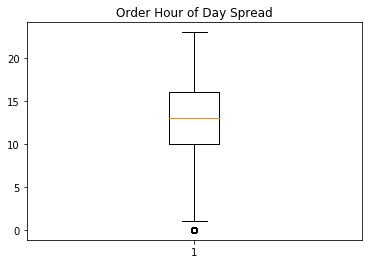

In [10]:
fig1, ax1 = plt.subplots()
ax1.set_title('Order Hour of Day Spread')
ax1.boxplot(instacart['order_hour_of_day']);

###Interactive Bar Plot

In [28]:
source = alt.UrlData(
    data.flights_2k.url,
    format={'parse': {'date': 'date'}}
)

brush = alt.selection(type='interval', encodings=['x'])

# Define the base chart, with the common parts of the
# background and highlights
base = alt.Chart().mark_bar().encode(
    x=alt.X(alt.repeat('column'), type='quantitative', bin=alt.Bin(maxbins=20)),
    y='count()'
).properties(
    width=180,
    height=130
)

# blue background with selection
background = base.properties(selection=brush)

# yellow highlights on the transformed data
highlight = base.encode(
    color=alt.value('goldenrod')
).transform_filter(brush)

# layer the two charts & repeat
alt.layer(
    background,
    highlight,
    data=source
).transform_calculate(
    "time",
    "hours(datum.date)"
).repeat(column=["distance", "delay", "time"])

RepeatChart({
  repeat: Repeat({
    column: ['distance', 'delay', 'time']
  }),
  spec: LayerChart({
    data: UrlData({
      format: {'parse': {'date': 'date'}},
      url: 'https://vega.github.io/vega-datasets/data/flights-2k.json'
    }),
    layer: [Chart({
      encoding: EncodingWithFacet({
        x: X({
          bin: BinParams({
            maxbins: 20
          }),
          shorthand: RepeatRef({
            repeat: 'column'
          }),
          type: 'quantitative'
        }),
        y: Y({
          shorthand: 'count()'
        })
      }),
      height: 130,
      mark: 'bar',
      selection: NamedSelection({
        selector001: SelectionDef({
          encodings: ['x'],
          type: 'interval'
        })
      }),
      width: 180
    }), Chart({
      encoding: EncodingWithFacet({
        color: ColorValue({
          value: 'goldenrod'
        }),
        x: X({
          bin: BinParams({
            maxbins: 20
          }),
          shorthand: RepeatRef({
            repeat: 'column'
          }),
          type: 'quantitative'
        }),
        y: Y({
          shorthand: 'count()'
        })
      }),
      height: 130,
      mark: 'bar',
      transform: [FilterTransform({
        filter: {'selection': 'selector001'}
      })],
      width: 180
    })],
    transform: [CalculateTransform({
      as: 'time',
      calculate: 'hours(datum.date)'
    })]
  })
})

###Bar Chart with Negative Values
Plotting employment change during the Great Recession

In [7]:
import altair as alt
import pandas as pd
from vega_datasets import data

#setting up the data sets needed for the graph
source = data.us_employment()
presidents = pd.DataFrame([
    {
        "start": "2006-01-01",
        "end": "2009-01-19",
        "president": "Bush"
    },
    {
        "start": "2009-01-20",
        "end": "2015-12-31",
        "president": "Obama"
    }
])

#defining coloring, titles, and labels - This chunk is the core of the graph
bars = alt.Chart(
    source,
    title="The U.S. employment crash during the Great Recession"
).mark_bar().encode(
    x=alt.X("month:T", title=""),
    y=alt.Y("nonfarm_change:Q", title="Change in non-farm employment (in thousands)"),
    color=alt.condition(             #coloring based on condition
        alt.datum.nonfarm_change > 0, 
        alt.value("green"),
        alt.value("red")
    )
)

#Place a vertical line at change of president
rule = alt.Chart(presidents).mark_rule(
    color="black",
    strokeWidth=2
).encode(
    x='end:T'
).transform_filter(alt.datum.president == "Bush")

#Setting text on the graph
text = alt.Chart(presidents).mark_text(
    align='left',
    baseline='middle',
    dx=7,
    dy=-135,
    size=11
).encode(
    x='start:T',
    x2='end:T',
    text='president',
    color=alt.value('#000000')
)

(bars + rule + text).properties(width=600)

LayerChart({
  layer: [Chart({
    data:           month  nonfarm  private  goods_producing  service_providing  \
    0    2006-01-01   135450   113603            22467             112983   
    1    2006-02-01   135762   113884            22535             113227   
    2    2006-03-01   136059   114156            22572             113487   
    3    2006-04-01   136227   114308            22631             113596   
    4    2006-05-01   136258   114332            22597             113661   
    5    2006-06-01   136337   114415            22598             113739   
    6    2006-07-01   136543   114570            22590             113953   
    7    2006-08-01   136722   114711            22572             114150   
    8    2006-09-01   136870   114788            22537             114333   
    9    2006-10-01   136882   114814            22456             114426   
    10   2006-11-01   137090   115007            22408             114682   
    11   2006-12-01   137263   115175            22405             114858   
    12   2007-01-01   137497   115402            22439             115058   
    13   2007-02-01   137582   115451            22334             115248   
    14   2007-03-01   137796   115647            22391             115405   
    15   2007-04-01   137855   115680            22350             115505   
    16   2007-05-01   138008   115815            22323             115685   
    17   2007-06-01   138085   115878            22323             115762   
    18   2007-07-01   138055   115884            22277             115778   
    19   2007-08-01   138027   115801            22165             115862   
    20   2007-09-01   138123   115844            22093             116030   
    21   2007-10-01   138201   115904            22056             116145   
    22   2007-11-01   138307   115973            22015             116292   
    23   2007-12-01   138411   116035            21976             116435   
    24   2008-01-01   138419   116031            21947             116472   
    25   2008-02-01   138338   115921            21897             116441   
    26   2008-03-01   138283   115840            21820             116463   
    27   2008-04-01   138054   115604            21681             116373   
    28   2008-05-01   137870   115387            21599             116271   
    29   2008-06-01   137716   115199            21483             116233   
    ..          ...      ...      ...              ...                ...   
    90   2013-07-01   136391   114576            18705             117686   
    91   2013-08-01   136651   114820            18756             117895   
    92   2013-09-01   136852   115017            18810             118042   
    93   2013-10-01   137062   115232            18857             118205   
    94   2013-11-01   137283   115440            18911             118372   
    95   2013-12-01   137376   115556            18881             118495   
    96   2014-01-01   137550   115740            18934             118616   
    97   2014-02-01   137732   115909            18986             118746   
    98   2014-03-01   137993   116162            19041             118952   
    99   2014-04-01   138304   116447            19102             119202   
    100  2014-05-01   138556   116693            19145             119411   
    101  2014-06-01   138862   116967            19194             119668   
    102  2014-07-01   139058   117180            19261             119797   
    103  2014-08-01   139284   117421            19307             119977   
    104  2014-09-01   139568   117672            19364             120204   
    105  2014-10-01   139823   117906            19411             120412   
    106  2014-11-01   140130   118196            19451             120679   
    107  2014-12-01   140381   118432            19482             120899   
    108  2015-01-01   140592   118637            19516             121076   
    109  2015-02-01   140859   11888

In [9]:
#looking at alt.datum
help(alt.datum)

Help on DatumType in module altair.expr.core object:

class DatumType(builtins.object)
 |  An object to assist in building Vega-Lite Expressions
 |  
 |  Methods defined here:
 |  
 |  __getattr__(self, attr)
 |  
 |  __getitem__(self, attr)
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [19]:
source = data.barley()

alt.Chart(source, title="The Morris Mistake").mark_point().encode(
    #what's mapped on the x axis
    alt.X(
        'yield:Q',
        title="Barley Yield (bushels/acre)", #X label at very bottom
        scale=alt.Scale(zero=False), #start at 0?
        axis=alt.Axis(grid=False) #vertical grid lines off
    ),
    
    #what's mapped on the y axis
    alt.Y(
        'variety:N',
        title="",
        sort=alt.EncodingSortField(field='yield', op='sum', order='descending'),
        scale=alt.Scale(rangeStep=20),
        axis=alt.Axis(grid=True)
    ),
    
    color=alt.Color('year:N', legend=alt.Legend(title="Year")),
    row=alt.Row(
        'site:N',
        title="",
        sort=alt.EncodingSortField(field='yield', op='sum', order='descending'),
    )
).configure_view(stroke="transparent") #drops the top and bottom bar of each graph section

Chart({
  config: Config({
    view: ViewConfig({
      stroke: 'transparent'
    })
  }),
  data:                 site           variety  year     yield
  0    University Farm         Manchuria  1931  27.00000
  1             Waseca         Manchuria  1931  48.86667
  2             Morris         Manchuria  1931  27.43334
  3          Crookston         Manchuria  1931  39.93333
  4       Grand Rapids         Manchuria  1931  32.96667
  5             Duluth         Manchuria  1931  28.96667
  6    University Farm           Glabron  1931  43.06666
  7             Waseca           Glabron  1931  55.20000
  8             Morris           Glabron  1931  28.76667
  9          Crookston           Glabron  1931  38.13333
  10      Grand Rapids           Glabron  1931  29.13333
  11            Duluth           Glabron  1931  29.66667
  12   University Farm          Svansota  1931  35.13333
  13            Waseca          Svansota  1931  47.33333
  14            Morris          Svansota  1931  25.76667
  15         Crookston          Svansota  1931  40.46667
  16      Grand Rapids          Svansota  1931  29.66667
  17            Duluth          Svansota  1931  25.70000
  18   University Farm            Velvet  1931  39.90000
  19            Waseca            Velvet  1931  50.23333
  20            Morris            Velvet  1931  26.13333
  21         Crookston            Velvet  1931  41.33333
  22      Grand Rapids            Velvet  1931  23.03333
  23            Duluth            Velvet  1931  26.30000
  24   University Farm             Trebi  1931  36.56666
  25            Waseca             Trebi  1931  63.83330
  26            Morris             Trebi  1931  43.76667
  27         Crookston             Trebi  1931  46.93333
  28      Grand Rapids             Trebi  1931  29.76667
  29            Duluth             Trebi  1931  33.93333
  ..               ...               ...   ...       ...
  90   University Farm           No. 457  1932  26.43334
  91            Waseca           No. 457  1932  42.20000
  92            Morris           No. 457  1932  43.53334
  93         Crookston           No. 457  1932  34.33333
  94      Grand Rapids           No. 457  1932  19.46667
  95            Duluth           No. 457  1932  22.70000
  96   University Farm           No. 462  1932  25.56667
  97            Waseca           No. 462  1932  44.70000
  98            Morris           No. 462  1932  47.00000
  99         Crookston           No. 462  1932  30.53333
  100     Grand Rapids           No. 462  1932  19.90000
  101           Duluth           No. 462  1932  22.50000
  102  University Farm          Peatland  1932  28.06667
  103           Waseca          Peatland  1932  36.03333
  104           Morris          Peatland  1932  43.20000
  105        Crookston          Peatland  1932  25.23333
  106     Grand Rapids          Peatland  1932  26.76667
  107           Duluth          Peatland  1932  31.36667
  108  University Farm           No. 475  1932  30.00000
  109           Waseca           No. 475  1932  41.26667
  110           Morris           No. 475  1932  44.23333
  111        Crookston           No. 475  1932  32.13333
  112     Grand Rapids           No. 475  1932  15.23333
  113           Duluth           No. 475  1932  27.36667
  114  University Farm  Wisconsin No. 38  1932  38.00000
  115           Waseca  Wisconsin No. 38  1932  58.16667
  116           Morris  Wisconsin No. 38  1932  47.16667
  117        Crookston  Wisconsin No. 38  1932  35.90000
  118     Grand Rapids  Wisconsin No. 38  1932  20.66667
  119           Duluth  Wisconsin No. 38  1932  29.33333
  
  [120 rows x 4 columns],
  encoding: EncodingWithFacet({
    color: Color({
      legend: Legend({
        title: 'Year'
      }),
      shorthand: 'year:N'
    }),
    row: Row({
      shorthand: 'site:N',
      sort: EncodingSortField({
        field: 'yield',
        op: 'sum',
        order: 'descending'
      }),
      title: ''
    }),
    x: X({
      axis